<a href="https://colab.research.google.com/gist/natiska/62b09ea88daf8972298548ff5772da8b/whylabs_custom_performance_metric_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>### 🚩 *Create a free WhyLabs account to get more value out of whylogs!*<br>
>*Did you know you can store, visualize, and monitor whylogs profiles with the [WhyLabs Observability Platform](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Writing_to_WhyLabs)? Sign up for a [free WhyLabs account](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Writing_to_WhyLabs) to leverage the power of whylogs and WhyLabs together!*

# Uploading custom performance metrics to WhyLabs

## Installing whylogs

First, let's install __whylogs__. Since we want to write to WhyLabs, we'll also install the __whylabs__ extra.

If you don't have it installed already, uncomment the line below:

In [4]:
# Note: you may need to restart the kernel to use updated packages.
%pip install -q 'whylogs[whylabs]'

## ✔️ Setting the Environment Variables

In order to send our profile to WhyLabs, let's first set up an account. You can skip this if you already have an account and a model set up.

We will need three pieces of information:

- API token
- Organization ID
- Dataset ID (or model-id)

Go to https://whylabs.ai/free and grab a free account. You can follow along with the examples if you wish, but if you’re interested in only following this demonstration, you can go ahead and skip the quick start instructions.

After that, you’ll be prompted to create an API token. Once you create it, copy and store it locally. The second important information here is your org ID. Take note of it as well. After you get your API Token and Org ID, you can go to https://hub.whylabsapp.com/models to see your projects dashboard. You can create a new project and take note of it's ID (if it's a model project it will look like `model-xxxx`).

We'll now set the credentials as environment variables. The WhyLabs Writer will check for the existence of these variables in order to send the profiles to your dashboard.

In [1]:
import getpass
import os

# set your org-id here - should be something like "org-xxxx"
print("Enter your WhyLabs Org ID")
os.environ["WHYLABS_DEFAULT_ORG_ID"] = input()

# set your datased_id (or model_id) here - should be something like "model-xxxx"
print("Enter your WhyLabs Dataset ID")
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = input()


# set your API key here
print("Enter your WhyLabs API key")
os.environ["WHYLABS_API_KEY"] = getpass.getpass()
print("Using API Key ID: ", os.environ["WHYLABS_API_KEY"][0:10])


Enter your WhyLabs Org ID
Enter your WhyLabs Dataset ID
Enter your WhyLabs API key
··········
Using API Key ID:  iSnmQQOV6g


## Fetching the Data

For demonstration, let's use data for transactions from a small retail business:

In [2]:
import pandas as pd

csv_url = "https://whylabs-public.s3.us-west-2.amazonaws.com/datasets/tour/current.csv"
df = pd.read_csv(csv_url)

df.head()

,Transaction ID,Customer ID,Quantity,Item Price,Total Tax,Total Amount,Store Type,Product Category,Product Subcategory,Gender,Transaction Type,Age
0,T14259136777,C274477,1,148.9,15.6345,164.5345,TeleShop,Electronics,Audio and video,F,Purchase,37.0
1,T7313351894,C267568,4,48.1,20.2020,212.6020,Flagship store,Home and kitchen,Furnishing,M,Purchase,25.0
2,T37745642681,C267098,1,10.9,1.1445,12.0445,Flagship store,Footwear,Mens,F,Purchase,42.0
3,T13861409908,C271608,2,135.2,28.3920,298.7920,MBR,Footwear,Mens,F,Purchase,43.0
4,T58956348529,C272484,4,144.3,60.6060,637.8060,TeleShop,Clothing,Mens,F,Purchase,39.0


## 📊 Profiling the Data

Let's profile the data with whylogs:

In [3]:
import whylogs as why
from datetime import datetime

current_date = datetime.now()
profile = why.log(df).profile()
profile.set_dataset_timestamp(current_date)

We're also setting the profile's dataset timestamp as the current datetime. If this is not set, the Writer would simply assign the current datetime automatically to the profile.

You can set the timestamp to past dates, if you want to backfill data into your dashboard. You should see data for the last 14 days at your dashboard within seconds or minutes once you send it.

## ✍️ The WhyLabs Writer

Now, you can simply create a WhyLabsWriter object and use it to send your profiles, like this:

In [4]:
from whylogs.api.writer.whylabs import WhyLabsWriter

writer = WhyLabsWriter()
writer.write(file=profile.view())

(True, 'log-XgpFnfSWcLr6LUM2')

A `200` response should mean that it went through successfully.

The writer expects a __Profile View__ as parameter.

# Logging custom performance metrics

### Calculating custom performance metrics

First, you will need to calculate your custom performance metric. In this example we'll just use a random float to populate this column.

In [5]:
import random

In [6]:
df["My metric"] = [random.random() for i in range(df.shape[0])]

In [7]:
df.head()

,Transaction ID,Customer ID,Quantity,Item Price,Total Tax,Total Amount,Store Type,Product Category,Product Subcategory,Gender,Transaction Type,Age,My metric
0,T14259136777,C274477,1,148.9,15.6345,164.5345,TeleShop,Electronics,Audio and video,F,Purchase,37.0,0.603042
1,T7313351894,C267568,4,48.1,20.2020,212.6020,Flagship store,Home and kitchen,Furnishing,M,Purchase,25.0,0.993265
2,T37745642681,C267098,1,10.9,1.1445,12.0445,Flagship store,Footwear,Mens,F,Purchase,42.0,0.691124
3,T13861409908,C271608,2,135.2,28.3920,298.7920,MBR,Footwear,Mens,F,Purchase,43.0,0.569421
4,T58956348529,C272484,4,144.3,60.6060,637.8060,TeleShop,Clothing,Mens,F,Purchase,39.0,0.307489


### Profiling and sending profiles to WhyLabs

Now let's upload this performance metric with today's timestamp. The new data will be appended to the profile we published in the previous step.
We're dropping the rest of the columns, as they have already been profiled.

In [8]:
df_perf = pd.DataFrame(df["My metric"])

In [9]:
current_date = datetime.now()
profile = why.log(df_perf).profile()
profile.set_dataset_timestamp(current_date)

In [10]:
writer = WhyLabsWriter()
writer.write(file=profile.view())

(True, 'log-mCzQqpLdgApuOTfB')

Now you should be able to see your performance metric in the Inputs view. Note that including "output" in the metric name will cause it to be displayed in the Outputs view instead.

### Registering custom performance metrics

Now that we have uploaded the new metric to WhyLabs, we need to register it as a performance metric via API. Once set, the custom performance metric will be listed alongside other performance metrics until removed via API.

**This step needs to be performed only once!**

In [11]:
%pip install git+https://github.com/whylabs/whylabs-client-python.git

  Cloning https://github.com/whylabs/whylabs-client-python.git to /tmp/pip-req-build-qmkamuch
  Running command git clone --filter=blob:none --quiet https://github.com/whylabs/whylabs-client-python.git /tmp/pip-req-build-qmkamuch
  Resolved https://github.com/whylabs/whylabs-client-python.git to commit e4238e2f87c5729e2431552b602c4ab25245a38c
  Preparing metadata (setup.py) ... done
  Created wheel for whylabs-client: filename=whylabs_client-0.4.6-py3-none-any.whl size=398350 sha256=e0dfd16e8657db83fc2ff69ede00b976c9aedeedd0d9c6c6105d51b6243415a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-wa7pzskl/wheels/bc/44/79/de0b3d66a0462c178634e8f945315080741abc6849902f3110
Successfully built whylabs-client
  Attempting uninstall: whylabs-client
    Found existing installation: whylabs-client 0.5.3
    Uninstalling whylabs-client-0.5.3:
      Successfully uninstalled whylabs-client-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [16]:
import time
import whylabs_client
from whylabs_client.api import models_api
from whylabs_client.model.metric_schema import MetricSchema
from whylabs_client.model.response import Response
from pprint import pprint
# Defining the host is optional and defaults to http://localhost
# See configuration.py for a list of all supported configuration parameters.
configuration = whylabs_client.Configuration(host="https://api.whylabsapp.com")

# The client must configure the authentication and authorization parameters
# in accordance with the API server security policy.
# Examples for each auth method are provided below, use the example that
# satisfies your auth use case.

# Configure API key authorization: ApiKeyAuth
configuration.api_key['ApiKeyAuth'] = os.environ["WHYLABS_API_KEY"]

# Enter a context with an instance of the API client
with whylabs_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = models_api.ModelsApi(api_client)
    org_id = os.environ["WHYLABS_DEFAULT_ORG_ID"]
    dataset_id = os.environ["WHYLABS_DEFAULT_DATASET_ID"]
    metric_schema = MetricSchema(
        label="My custom metric",
        column="My metric",
        default_metric="median",
    ) # MetricSchema |

    # example passing only required values which don't have defaults set
    try:
        # Save the schema of a single metric for a given dataset.
        api_response = api_instance.put_entity_schema_metric(org_id, dataset_id, metric_schema)
        pprint(api_response)
    except whylabs_client.ApiException as e:
        print("Exception when calling ModelsApi->put_entity_schema_metric: %s\n" % e)

{'request_id': 'f3235946-e981-4d13-af2f-879c4b0be4c7'}


Once this code runs, you should see your custom performance metric in the Performance tab.

## Going from One to Many Profiles

The following code snippet is splitting the dataframe into seven chunks, and logging each chunk for each day of the last week.

In this we're logging all data along with the custom performance metric at once.

In [17]:
import numpy as np
from datetime import datetime, timedelta
from whylogs.api.writer.whylabs import WhyLabsWriter

writer = WhyLabsWriter()

df_splits = np.array_split(df, 7)

def log_data(df,timestamp):
    profile = why.log(df).profile()
    profile.set_dataset_timestamp(timestamp)
    writer.write(file=profile.view())
    print("Logged profile for {}".format(timestamp))

# This will log each data split for the last 7 days, starting with the current date and finishing 7 days in the past
for day, df_split in enumerate(df_splits):
    dataset_timestamp = datetime.now() - timedelta(days=day)
    log_data(df_split,dataset_timestamp)

Logged profile for 2023-07-19 19:01:21.028445


Logged profile for 2023-07-18 19:01:22.456356


Logged profile for 2023-07-17 19:01:23.124455


Logged profile for 2023-07-16 19:01:23.753287
Logged profile for 2023-07-15 19:01:24.275333


Logged profile for 2023-07-14 19:01:24.790332
Logged profile for 2023-07-13 19:01:25.466729


After successful execution of the above code you should see your performance metric visualized over time in the Performance tab as seen in the screenshot below:

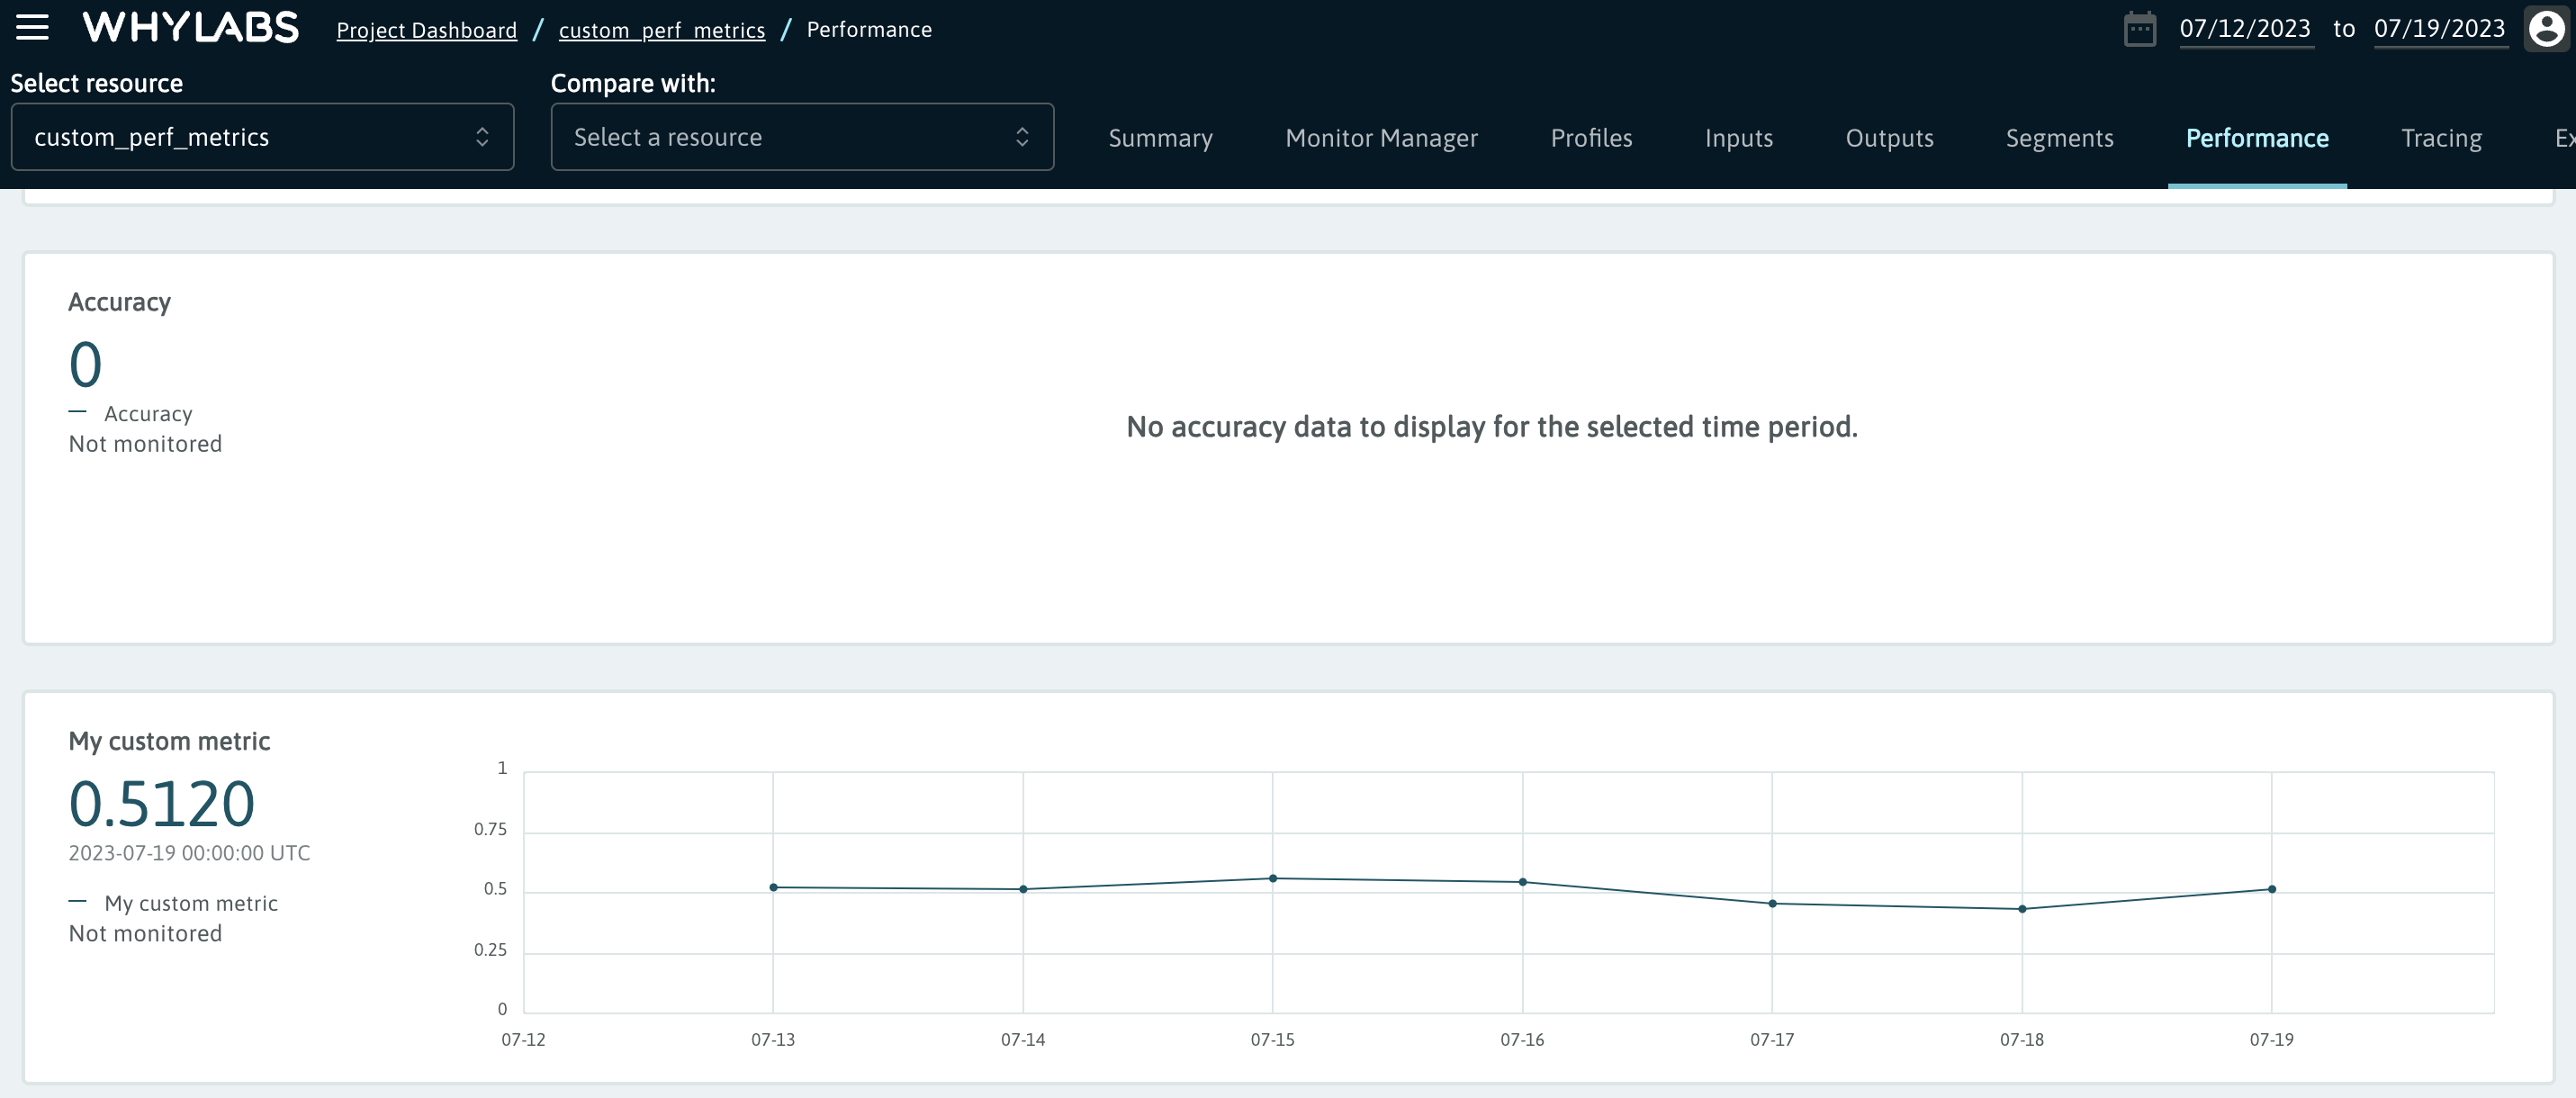